In [1]:
%pip install ultralytics > /dev/null 2>&1

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.31 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10827MiB)
Setup complete ✅ (20 CPUs, 93.0 GB RAM, 6.1/46.5 GB disk)


In [2]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zEbKQP7X3qDC9M09CI5O")
project = rf.workspace("whalecrop").project("cetacean-detector")
version = project.version(1)
dataset = version.download("yolov5")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


In [4]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 single_cls


Ultralytics YOLOv8.2.31 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10827MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jctactay/Cetacean-Detector-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [23]:
!yolo task=detect mode=val model=$HOME/runs/detect/train7/weights/best.pt data=/home/jctactay/Cetacean-Detector-1/data.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10827MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/jctactay/Cetacean-Detector-1/valid/labels.cache... 95 images
/home/jctactay/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         95        115      0.888       0.83      0.919      0.611
Speed: 3.1ms preprocess, 25.8ms inference, 0.0ms loss, 22.5ms postprocess per 

In [27]:
import matplotlib.pyplot as plt
from PIL import Image

(-0.5, 2399.5, 1199.5, -0.5)

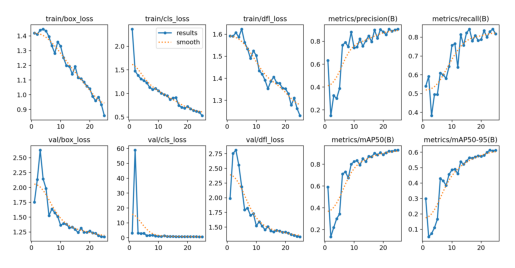

In [32]:
path = "runs/detect/train7/results.png"

img = Image.open(path)

plt.imshow(img)
plt.axis('off')

In [37]:
!yolo task=detect mode=predict model=$HOME/runs/detect/train7/weights/best.pt conf=0.25 source=/home/jctactay/Cetacean-Detector-1/test/images

Ultralytics YOLOv8.2.31 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10827MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/46 /home/jctactay/Cetacean-Detector-1/test/images/PIFSC_20201031-S3_L-0674_JPG.rf.56c7d0af5f981e6056b959c64af80e9d.jpg: 448x640 5 cetaceans, 91.4ms
image 2/46 /home/jctactay/Cetacean-Detector-1/test/images/PIFSC_20201031-S3_L-0684_JPG.rf.c6a82c9647ee2e50f4862b8f4e441594.jpg: 448x640 6 cetaceans, 6.0ms
image 3/46 /home/jctactay/Cetacean-Detector-1/test/images/PIFSC_20201031-S3_L-0706_JPG.rf.ff4036508929c5b70544ca2e31f87b4e.jpg: 448x640 1 cetacean, 7.0ms
image 4/46 /home/jctactay/Cetacean-Detector-1/test/images/PIFSC_20201031-S3_L-0717_JPG.rf.2c1341d92a8d4c1001eb5e78e34b31bc.jpg: 448x640 2 cetaceans, 6.3ms
image 5/46 /home/jctactay/Cetacean-Detector-1/test/images/PIFSC_20201031-S3_L-0721_JPG.rf.fcb2bfeb511f38f045172b36f8914f99.jpg: 448x640 1 cetacean, 7.4ms
image 6/46 /home/jctactay/Cetacean-Detec

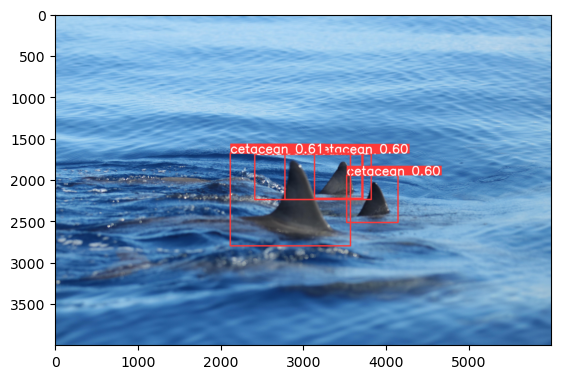

In [39]:
img_path = "runs/detect/predict/PIFSC_20201031-S3_L-0674_JPG.rf.56c7d0af5f981e6056b959c64af80e9d.jpg"

plt.imshow(Image.open(img_path))

In [45]:
HOME = "/home/jctactay"

In [46]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train7/")

Dependency ultralytics==8.0.196 is required but found version=8.2.31, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/whalecrop/cetacean-detector/1
Share your model with the world at: https://universe.roboflow.com/whalecrop/cetacean-detector/model/1
